In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [4]:
#load dataset
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
#Normalize pixel values

x_train = x_train/255.0
x_test = x_test/255.0

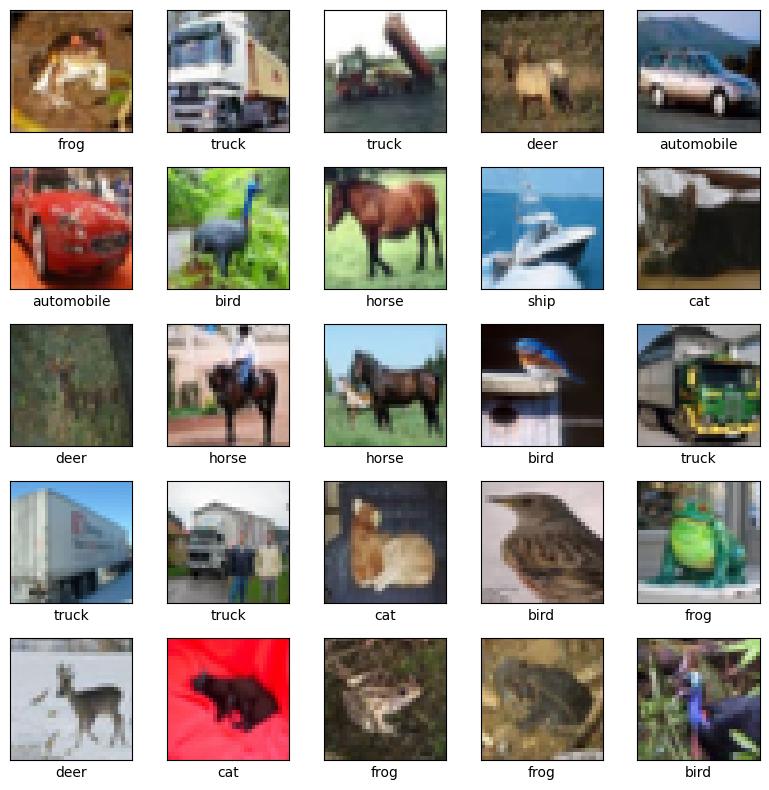

In [12]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])  # y_train is a 2D array, so we access the label via y_train[i][0]

plt.tight_layout()
plt.show()


In [6]:
#bulid CNN
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')


])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history=model.fit(x_train,y_train,epochs=10,
                  validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.7930 - loss: 0.5840 - val_accuracy: 0.7072 - val_loss: 0.9169
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.8077 - loss: 0.5357 - val_accuracy: 0.7035 - val_loss: 0.9448
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.8234 - loss: 0.5073 - val_accuracy: 0.7092 - val_loss: 0.9215
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.8298 - loss: 0.4759 - val_accuracy: 0.7043 - val_loss: 0.9432
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8395 - loss: 0.4492 - val_accuracy: 0.7022 - val_loss: 0.9597
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8514 - loss: 0.4169 - val_accuracy: 0.6988 - val_loss: 1.0020
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.8614 - loss: 0.3979 - val_accuracy: 0.7038 - val_loss: 1.0482
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.8686 -

In [15]:
#Evaluate on Test data
test_loss, test_acc=model.evaluate(x_test, y_test)
print(f"Test Accuracy:{test_acc:4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7016 - loss: 1.1414
Test Accuracy:0.695600


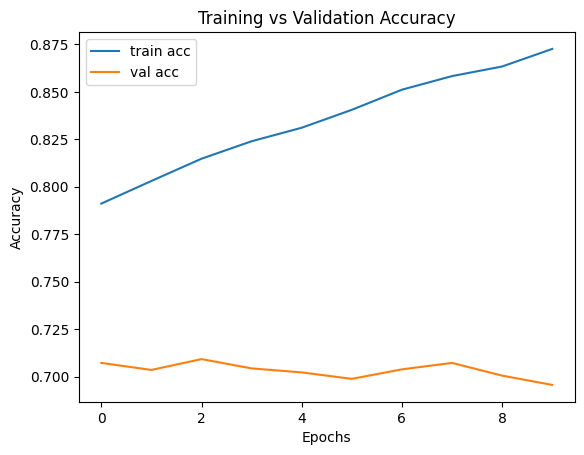

In [16]:
#  Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
